In [6]:
import numpy as np 
import os 
import glob 
import cv2 
import matplotlib.pyplot as plt 

import insightface 
from insightface.app import FaceAnalysis

In [7]:
print('insightface',insightface.__version__)
print('numpy',np.__version__)

insightface 0.7.3
numpy 2.2.3


In [8]:
app=FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0,det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\KARTAVYA/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\KARTAVYA/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\KARTAVYA/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\KARTAVYA/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\KARTAVYA/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3,

In [9]:
swapper=insightface.model_zoo.get_model('C:/Users/KARTAVYA/.insightface/models/inswapper_128.onnx',download=False,download_zip=False)
print(swapper)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [10]:
def swap_n_show(img1_fn,img2_fn,app,swapper,plot_before=True,plot_after=True):
    """
    uses face swapper to swap faces in two different images

    plot_before:if true shows the images before the swap
    plot_after:if true shows the images after swap

    returns image with swapped faces

    assumes one face image
    """

    img1=cv2.imread(img1_fn)
    img2=cv2.imread(img2_fn)

    if plot_before:
        fig,axs=plt.subplots(1,2,figsize=(10,5))
        axs[0].imshow(img1[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:,:,::-1])
        axs[1].axis('off')
        plt.show()

    #do the swap
    face1=app.get(img1)[0]
    face2=app.get(img2)[0]

    img1_=img1.copy()
    img2_=img2.copy()

    if plot_after:
        img1_=swapper.get(img1_,face1,face2,paste_back=True)
        img2_=swapper.get(img2_,face2,face1,paste_back=True)
        fig,axs=plt.subplots(1,2,figsize=(10,5))
        axs[0].imshow(img1_[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2_[:,:,::-1])
        axs[1].axis('off')
        plt.show()

    return img1_,img2_




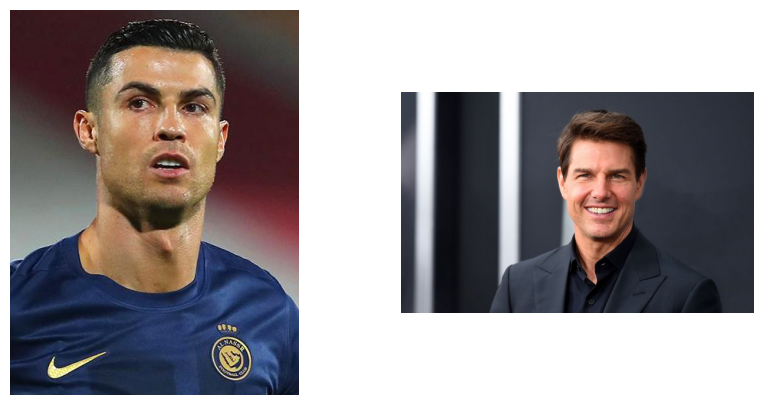

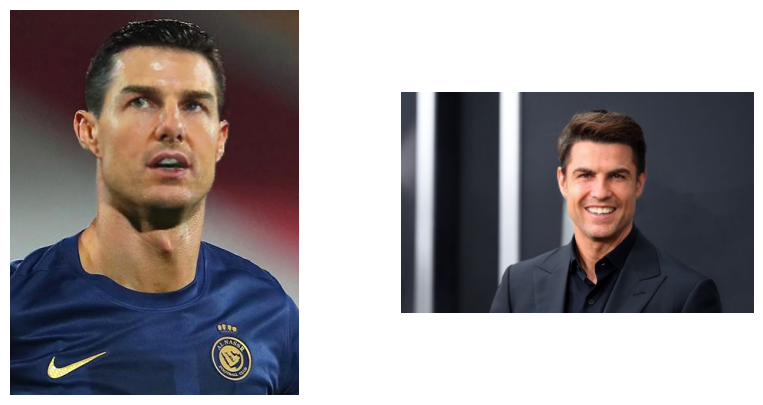

In [11]:
_=swap_n_show('Cristiano_Ronaldo,_2023.jpg','tom-cruise-net-worth.jpg',app,swapper)